<a href="https://colab.research.google.com/github/Ranjani94/Deep_Learning/blob/master/homework1/keras_mnist_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MNIST database of handwritten digits

In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [43]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


#Downloading the dataset

In [57]:
fashion_mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
class_names =['1','2','3','4','5','6','7','8','9','0']

#Exploring the data

In [59]:
train_images.shape

(60000, 28, 28)

In [60]:
len(train_labels)

60000

In [61]:
test_images.shape

(10000, 28, 28)

In [62]:
len(test_labels)

10000

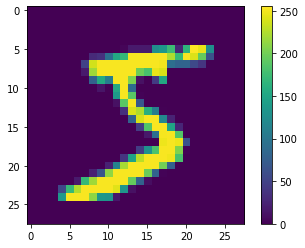

In [66]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

#Preprocessing the data

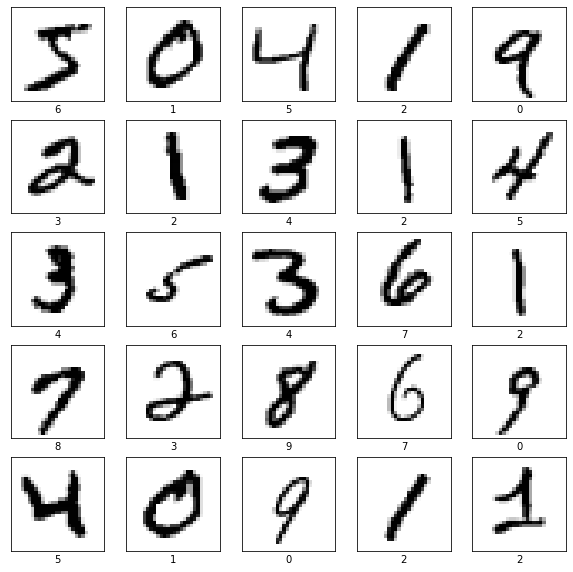

In [68]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

#Building a model

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [71]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 119us/sample - loss: 0.2578 - accuracy: 0.9265
Epoch 2/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.1150 - accuracy: 0.9653
Epoch 3/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0786 - accuracy: 0.9766
Epoch 4/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.0591 - accuracy: 0.9824
Epoch 5/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0447 - accuracy: 0.9863
Epoch 6/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.0360 - accuracy: 0.9884
Epoch 7/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.0275 - accuracy: 0.9916
Epoch 8/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0240 - accuracy: 0.9922
Epoch 9/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.0194 - accuracy: 0.9937
Epoch 10/10
6

#Evaluating the accuracy

In [72]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 1s - loss: 0.0800 - accuracy: 0.9783

Test accuracy: 0.9783


In [0]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

#Making predictions

In [0]:
predictions = probability_model.predict(test_images)

In [75]:
predictions[0]

array([3.4343063e-11, 6.9541497e-09, 3.7141501e-07, 1.4862979e-03,
       7.7413546e-14, 3.7518882e-10, 1.7446134e-14, 9.9851209e-01,
       9.5943191e-09, 1.2399050e-06], dtype=float32)

In [76]:
np.argmax(predictions[0])

7

In [77]:
test_labels[0]

7

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

#Evaluating the predictions

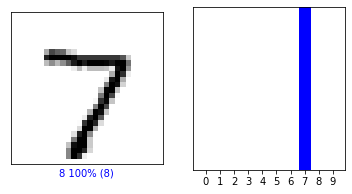

In [79]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

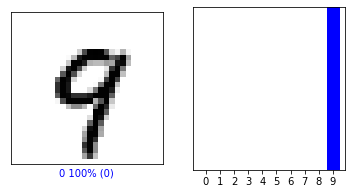

In [80]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

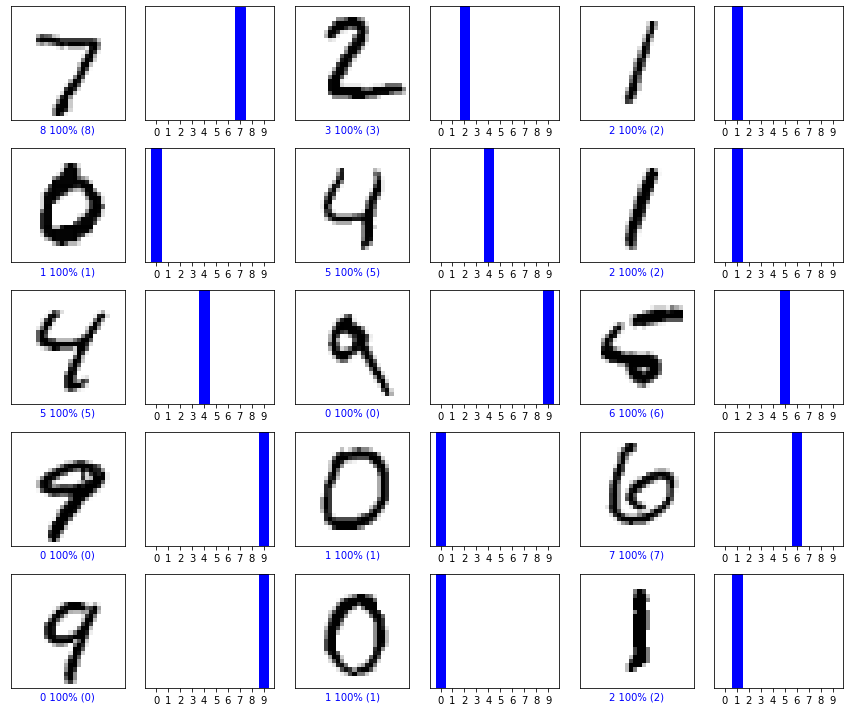

In [81]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

#Using the trained model

In [82]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [83]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [84]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[7.7187730e-13 4.7472136e-06 9.9999523e-01 3.8346851e-10 2.1752666e-24
  7.5616119e-10 2.4105211e-13 8.4851799e-20 2.1727924e-08 1.6276266e-18]]


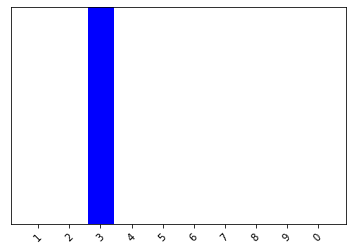

In [85]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [86]:
np.argmax(predictions_single[0])

2